### Introduction du Decision Tree algorithm

Aujourd'hui, cet algorithme est connu sous son nom moderne CART Classification and Regression Trees (appelé ID3, C4.5, puis C5.0, utilisé uniquement pour la classification).

Dans cet algorithme, il existe une structure arborescente dans laquelle chaque nœud interne représente un test sur un attribut, chaque branche représente le résultat du test et chaque nœud feuille représente une étiquette de classe. Les chemins allant du nœud racine au nœud feuille représentent les règles de classification.

*Critères de division:

Les deux mesures de sélection d'attributs les plus utilisés sont l'entropie de Shannon et l'indice de Gini (entropie quadratique).

**Indice de Gini: c'est la proba qu'un échantillon choisi aléatoirement soit mal classé s'il est affecté à une classe selon la distribution actuelle.

Pour un noeud N comportant k classes, gini=1-sum_k(Pj²) où Pj est la proportion d'éléments dans chaque classe j. Si gini=0 on a donc pureté maximale.

**Entropie de Shannon: mesure l'incertitude dans une distribution de classes. Si ent=0 on a donc pureté maximale.


*Gain d'information: métrique pour évaluer la qualité d'une division des données basé sur le concept d'entropie. Plus qu'il soit élevé, plus qu'il offre le meilleur fractionnement: il effectue correctement le classement.

Voici un simple exemple sur l'evaluation des voitures

Decision Tree Classifier with criterion gini index

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import accuracy_score

In [42]:
df= pd.read_csv("./DB/car_evaluation.csv")

In [43]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [44]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [45]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# feature eng
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [17]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


DecisionTreeClassifier model with criterion gini index

In [40]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

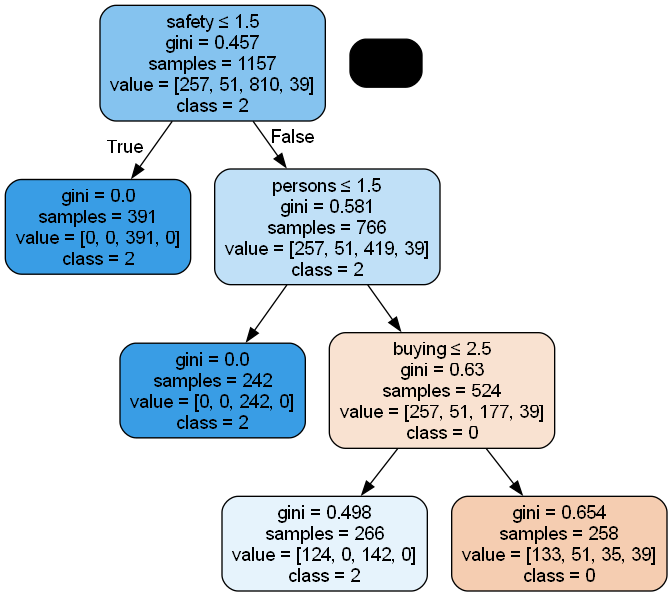

In [31]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,
 feature_names =df.columns[0:6],
 class_names=['0','1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('car_evaluation.png')
Image(graph.create_png()) 

DecisionTreeClassifier model with criterion entropy

In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [34]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


In [39]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


Le modèle donne de très bonnes performances comme l'indique la précision du modèle dans les deux cas qui s'est avérée être de 0,8021 (car la taille des données est petite)